In [1]:
import time
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
from dnn_app_utils_v3 import *
from public_tests import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)


In [2]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_data()


y = 1. It's a cat picture.


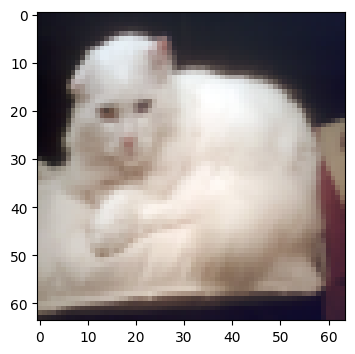

In [5]:
# Example of a picture
index = 13
plt.imshow(train_x_orig[index])
print ("y = " + str(train_y[0,index]) + ". It's a " + classes[train_y[0,index]].decode("utf-8") +  " picture.")

In [6]:
# Explore your dataset 
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x_orig shape: " + str(train_x_orig.shape))
print ("train_y shape: " + str(train_y.shape))
print ("test_x_orig shape: " + str(test_x_orig.shape))
print ("test_y shape: " + str(test_y.shape))

Number of training examples: 209
Number of testing examples: 50
Each image is of size: (64, 64, 3)
train_x_orig shape: (209, 64, 64, 3)
train_y shape: (1, 209)
test_x_orig shape: (50, 64, 64, 3)
test_y shape: (1, 50)


In [7]:
# Reshape the training and test examples 
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))

train_x's shape: (12288, 209)
test_x's shape: (12288, 50)


**---------------------2 LAYER NN---------------------**

In [8]:
### CONSTANTS DEFINING THE MODEL ####
n_x = 12288     # num_px * num_px * 3
n_h = 7
n_y = 1
layers_dims = (n_x, n_h, n_y)
learning_rate = 0.0075

In [25]:
# GRADED FUNCTION: two_layer_model

def two_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):
    """
    Implements a two-layer neural network: LINEAR->RELU->LINEAR->SIGMOID.
    
    Arguments:
    X -- input data, of shape (n_x, number of examples)
    Y -- true "label" vector (containing 1 if cat, 0 if non-cat), of shape (1, number of examples)
    layers_dims -- dimensions of the layers (n_x, n_h, n_y)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- If set to True, this will print the cost every 100 iterations 
    
    Returns:
    parameters -- a dictionary containing W1, W2, b1, and b2
    costs -- array containing cost after every 100 iterations
    """
    n_x, n_h, n_y = layers_dims
    np.random.seed(1)
    grads = {}
    costs = []                              # to keep track of the cost
    
    # INTIALIZING PARAMS
    params = initialize_parameters(n_x, n_h, n_y)
    W1 = params['W1']
    W2 = params['W2']
    b1 = params['b1']
    b2 = params['b2']

    for i in range(num_iterations):

        # FORWARD PROP
        A1, cache1 = linear_activation_forward(X, W1, b1, 'relu')
        A2, cache2 = linear_activation_forward(A1, W2, b2, 'sigmoid')

        # COMPUTING COST
        cost = compute_cost(A2, Y)

        if(i == num_iterations - 1 or i % 100 == 0):
            costs.append(cost)
            if print_cost: print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        
        # BACKWARD PROP
        dA2 = - np.divide(Y, A2) + np.divide(1-Y, 1-A2)
        dA1, dW2, db2 = linear_activation_backward(dA2, cache2, 'sigmoid')
        dA0, dW1, db1 = linear_activation_backward(dA1, cache1, 'relu')

        # UPDATING PARAMS
        W1 = W1 - learning_rate * dW1
        W2 = W2 - learning_rate * dW2
        b1 = b1 - learning_rate * db1
        b2 = b2 - learning_rate * db2
    
    params['b1'] = b1
    params['b2'] = b2
    params['W1'] = W1
    params['W2'] = W2

    return params, costs



def plot_costs(costs, learning_rate=0.0075):
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()


In [26]:
parameters, costs = two_layer_model(train_x, train_y, layers_dims = (n_x, n_h, n_y), num_iterations = 2, print_cost=False)

print("Cost after first iteration: " + str(costs[0]))

two_layer_model_test(two_layer_model)


Cost after first iteration: 0.693049735659989
 1  Tests passed
 3  Tests failed


AssertionError: Not all tests were passed for two_layer_model. Check your equations and avoid using global variables inside the function.

Cost after iteration 0: 0.693049735659989
Cost after iteration 100: 0.6464320953428849
Cost after iteration 200: 0.6325140647912677
Cost after iteration 300: 0.6015024920354664
Cost after iteration 400: 0.5601966311605746
Cost after iteration 500: 0.5158304772764729
Cost after iteration 600: 0.4754901313943325
Cost after iteration 700: 0.4339163151225749
Cost after iteration 800: 0.4007977536203889
Cost after iteration 900: 0.3580705011323798
Cost after iteration 1000: 0.3394281538366412
Cost after iteration 1100: 0.3052753636196265
Cost after iteration 1200: 0.27491377282130164
Cost after iteration 1300: 0.2468176821061486
Cost after iteration 1400: 0.19850735037466102
Cost after iteration 1500: 0.17448318112556607
Cost after iteration 1600: 0.17080762978096245
Cost after iteration 1700: 0.11306524562164731
Cost after iteration 1800: 0.09629426845937153
Cost after iteration 1900: 0.08342617959726864
Cost after iteration 1999: 0.07458506999166609


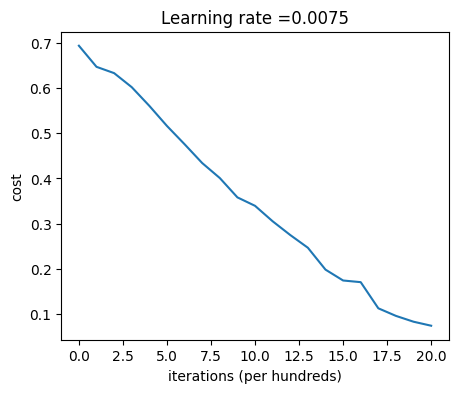

In [33]:
parameters, costs = two_layer_model(train_x, train_y, layers_dims = (n_x, n_h, n_y), num_iterations = 2000, print_cost=True)
plot_costs(costs, learning_rate)


In [34]:
predictions_train = predict(train_x, train_y, parameters)

Accuracy: 0.9856459330143539


In [35]:
predictions_test = predict(test_x, test_y, parameters)

Accuracy: 0.72


In [76]:
## CONSTANTS ###
layers_dims = [12288, 20, 7, 5, 1] #  4-layer model


In [77]:
# GRADED FUNCTION: L_layer_model

def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- data, numpy array of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    np.random.seed(1)
    costs = []                         # keep track of cost

    # INITIALIZING THE PARAMS
    params = initialize_parameters_deep(layers_dims)

    for i in range(num_iterations):
        # FORWARD PROP
        AL, cache = L_model_forward(X, params)

        # COMPUTING COST
        cost = compute_cost(AL, Y)

        # Print the cost every 100 iterations               # TAKEN FROM THE SHEET SINCE MY METHOD MESSES WITH THE TESTING FUNCTIONS (weird lol)
        if print_cost and i % 100 == 0 or i == num_iterations - 1:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if i % 100 == 0 or i == num_iterations:
            costs.append(cost)

        # BACKWARD PROP
        grads = L_model_backward(AL, Y, cache)

        # GRADIENT DESCENT or UPDATE PARAMETERS
        params = update_parameters(params, grads, learning_rate)
    

    # RETURN LEARNED PARAMS
    return params, costs

In [78]:
parameters, costs = L_layer_model(train_x, train_y, layers_dims, num_iterations = 1, print_cost = False)

print("Cost after first iteration: " + str(costs[0]))

L_layer_model_test(L_layer_model)


Cost after iteration 0: 0.7717493284237686
Cost after first iteration: 0.7717493284237686
Cost after iteration 1: 0.7070709008912569
Cost after iteration 1: 0.7070709008912569
Cost after iteration 1: 0.7070709008912569
Cost after iteration 2: 0.7063462654190897
 All tests passed.


In [79]:
parameters, costs = L_layer_model(train_x, train_y, layers_dims, num_iterations = 2500, print_cost = True)


Cost after iteration 0: 0.7717493284237686
Cost after iteration 100: 0.6720534400822914
Cost after iteration 200: 0.6482632048575212
Cost after iteration 300: 0.6115068816101354
Cost after iteration 400: 0.5670473268366112
Cost after iteration 500: 0.5401376634547801
Cost after iteration 600: 0.5279299569455267
Cost after iteration 700: 0.46547737717668514
Cost after iteration 800: 0.369125852495928
Cost after iteration 900: 0.39174697434805344
Cost after iteration 1000: 0.31518698886006163
Cost after iteration 1100: 0.2726998441789385
Cost after iteration 1200: 0.23741853400268137
Cost after iteration 1300: 0.19960120532208644
Cost after iteration 1400: 0.18926300388463305
Cost after iteration 1500: 0.16118854665827748
Cost after iteration 1600: 0.14821389662363316
Cost after iteration 1700: 0.1377748781297294
Cost after iteration 1800: 0.1297401754919012
Cost after iteration 1900: 0.12122535068005212
Cost after iteration 2000: 0.11382060668633709
Cost after iteration 2100: 0.10783928

In [80]:
pred_train = predict(train_x, train_y, parameters)


Accuracy: 0.9856459330143539


In [81]:
pred_test = predict(test_x, test_y, parameters)


Accuracy: 0.8


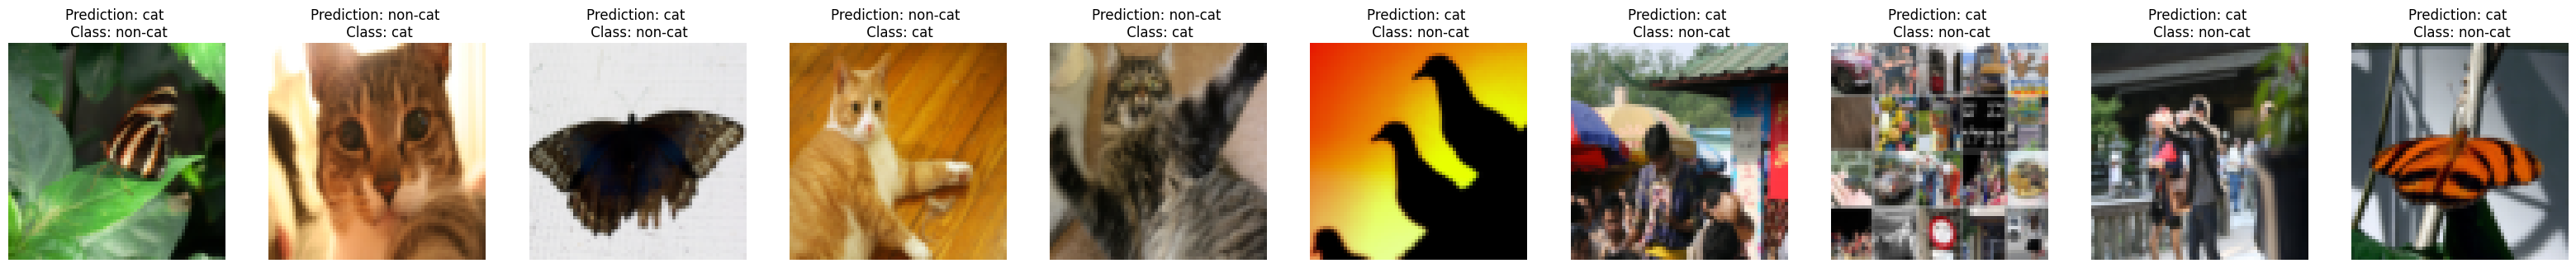

In [82]:
print_mislabeled_images(classes, test_x, test_y, pred_test)


Accuracy: 1.0
y = 1.0, your L-layer model predicts a "cat" picture.


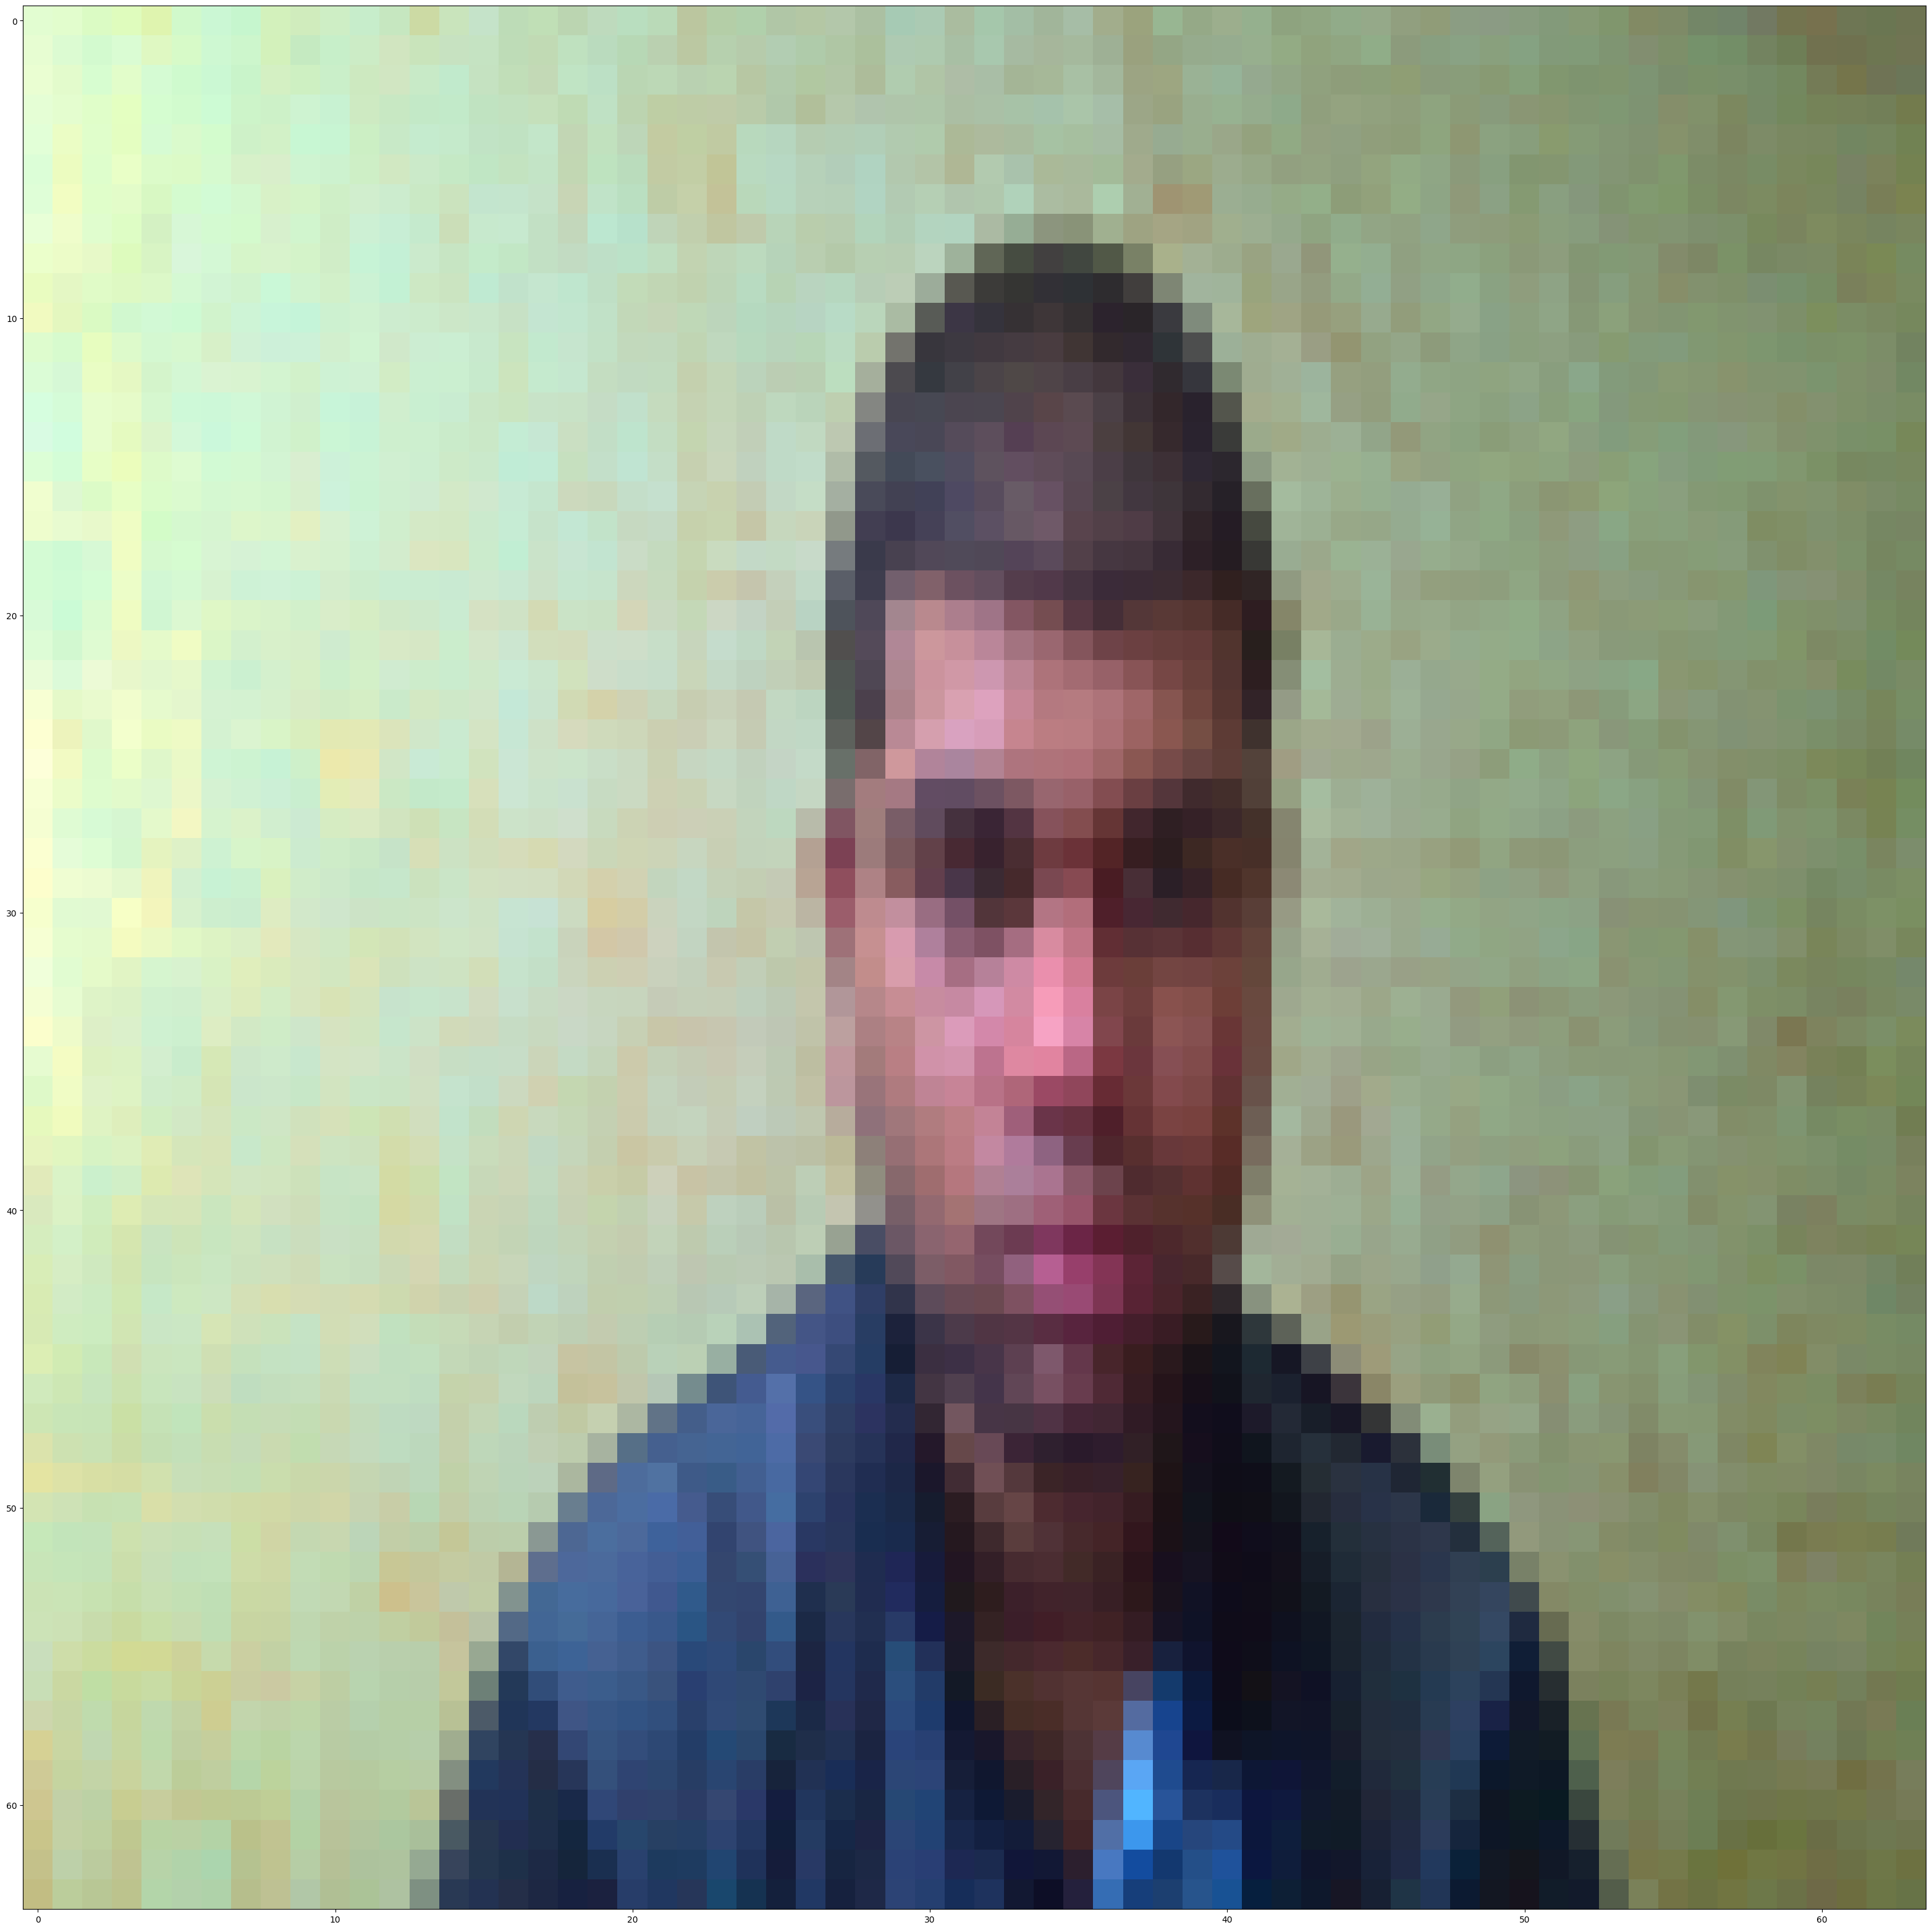

In [83]:
## START CODE HERE ##
my_image = "my_image2.jpg" # change this to the name of your image file 
my_label_y = [1] # the true class of your image (1 -> cat, 0 -> non-cat)
## END CODE HERE ##

fname = "images/" + my_image
image = np.array(Image.open(fname).resize((num_px, num_px)))
plt.imshow(image)
image = image / 255.
image = image.reshape((1, num_px * num_px * 3)).T

my_predicted_image = predict(image, my_label_y, parameters)


print ("y = " + str(np.squeeze(my_predicted_image)) + ", your L-layer model predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")
